In [1]:
import sympy
from sympy import MutableDenseNDimArray, Symbol, derive_by_array, Transpose
from sympy import init_printing
import numpy as np

In [2]:
init_printing()

In [3]:
# N_in = 3
# H_in = 5
# W_in = 5

# N_out = 3
# K = 3
N_in = 3
H_in = 3
W_in = 3

N_out = 3
K = 2
H_out = H_in-K+1
W_out = W_in-K+1

In [4]:
I_Array = MutableDenseNDimArray.zeros(N_in, H_in, W_in)

In [5]:
counter = 0
for n in range(N_in):
    for h in range(H_in):
        for w in range(W_in):
#             I_Array[n, h, w] = Symbol('I('+str(n)+','+str(h)+','+str(w)+')')
            counter += 1
            I_Array[n, h, w] = Symbol('I_'+str(counter))

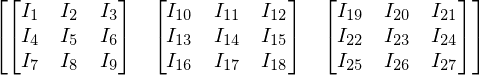

In [6]:
I_Array

In [7]:
W_Array = MutableDenseNDimArray.zeros(N_out, N_in, K, K)

In [8]:
counter = 0
for n_o in range(N_out):
    for n_i in range(N_in):
        for k_h in range(K):
            for k_w in range(K):
                counter += 1
                W_Array[n_o, n_i, k_h, k_w] = Symbol('W_'+str(counter))
#                 W_Array[n_o, n_i, k_h, k_w] = Symbol('W('+str(n_o)+','+str(n_i)+','+str(k_h)+','+str(k_w)+')')

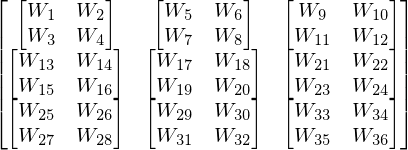

In [9]:
W_Array

In [10]:
B_Array = MutableDenseNDimArray.zeros(N_out, 1)

In [11]:
counter = 0
for n_o in range(N_out):
    counter += 1
    B_Array[n_o] = Symbol('B_'+str(counter))
#     B_Array[n_o] = Symbol('B('+str(n_o)+')')

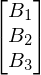

In [12]:
B_Array

In [13]:
O_Array = MutableDenseNDimArray.zeros(N_out, H_out, W_out)
counter = 0
for n_o in range(N_out):
# for n_o in range(1):
    for n_i in range(N_in):
        for start_h in range(H_out):
            for start_w in range(W_out):
                I_patch = I_Array[n_i, start_h:start_h+K, start_w:start_w+K]
                W_patch = W_Array[n_o, n_i, :, :]
#                 print(I_patch)
#                 print(W_patch)
                for k_h in range(K):
                    for k_w in range(K):
                        O_Array[n_o, start_h, start_w] += I_patch[k_h, k_w]*W_patch[k_h, k_w]

for n in range(N_out):
    for h in range(H_out):
        for w in range(W_out):
            O_Array[n, h, w] += B_Array[n, 0]
        
# print(O_Array[0, 0, 0])
# print(O_Array)

In [14]:
C = sum(O_Array)

In [15]:
C

In [16]:
print(derive_by_array(C, I_Array))

[[[W_1 + W_13 + W_25, W_1 + W_13 + W_14 + W_2 + W_25 + W_26, W_14 + W_2 + W_26], [W_1 + W_13 + W_15 + W_25 + W_27 + W_3, W_1 + W_13 + W_14 + W_15 + W_16 + W_2 + W_25 + W_26 + W_27 + W_28 + W_3 + W_4, W_14 + W_16 + W_2 + W_26 + W_28 + W_4], [W_15 + W_27 + W_3, W_15 + W_16 + W_27 + W_28 + W_3 + W_4, W_16 + W_28 + W_4]], [[W_17 + W_29 + W_5, W_17 + W_18 + W_29 + W_30 + W_5 + W_6, W_18 + W_30 + W_6], [W_17 + W_19 + W_29 + W_31 + W_5 + W_7, W_17 + W_18 + W_19 + W_20 + W_29 + W_30 + W_31 + W_32 + W_5 + W_6 + W_7 + W_8, W_18 + W_20 + W_30 + W_32 + W_6 + W_8], [W_19 + W_31 + W_7, W_19 + W_20 + W_31 + W_32 + W_7 + W_8, W_20 + W_32 + W_8]], [[W_21 + W_33 + W_9, W_10 + W_21 + W_22 + W_33 + W_34 + W_9, W_10 + W_22 + W_34], [W_11 + W_21 + W_23 + W_33 + W_35 + W_9, W_10 + W_11 + W_12 + W_21 + W_22 + W_23 + W_24 + W_33 + W_34 + W_35 + W_36 + W_9, W_10 + W_12 + W_22 + W_24 + W_34 + W_36], [W_11 + W_23 + W_35, W_11 + W_12 + W_23 + W_24 + W_35 + W_36, W_12 + W_24 + W_36]]]


In [17]:
print(derive_by_array(C, W_Array))

[[[[I_1 + I_2 + I_4 + I_5, I_2 + I_3 + I_5 + I_6], [I_4 + I_5 + I_7 + I_8, I_5 + I_6 + I_8 + I_9]], [[I_10 + I_11 + I_13 + I_14, I_11 + I_12 + I_14 + I_15], [I_13 + I_14 + I_16 + I_17, I_14 + I_15 + I_17 + I_18]], [[I_19 + I_20 + I_22 + I_23, I_20 + I_21 + I_23 + I_24], [I_22 + I_23 + I_25 + I_26, I_23 + I_24 + I_26 + I_27]]], [[[I_1 + I_2 + I_4 + I_5, I_2 + I_3 + I_5 + I_6], [I_4 + I_5 + I_7 + I_8, I_5 + I_6 + I_8 + I_9]], [[I_10 + I_11 + I_13 + I_14, I_11 + I_12 + I_14 + I_15], [I_13 + I_14 + I_16 + I_17, I_14 + I_15 + I_17 + I_18]], [[I_19 + I_20 + I_22 + I_23, I_20 + I_21 + I_23 + I_24], [I_22 + I_23 + I_25 + I_26, I_23 + I_24 + I_26 + I_27]]], [[[I_1 + I_2 + I_4 + I_5, I_2 + I_3 + I_5 + I_6], [I_4 + I_5 + I_7 + I_8, I_5 + I_6 + I_8 + I_9]], [[I_10 + I_11 + I_13 + I_14, I_11 + I_12 + I_14 + I_15], [I_13 + I_14 + I_16 + I_17, I_14 + I_15 + I_17 + I_18]], [[I_19 + I_20 + I_22 + I_23, I_20 + I_21 + I_23 + I_24], [I_22 + I_23 + I_25 + I_26, I_23 + I_24 + I_26 + I_27]]]]


In [18]:
print(derive_by_array(C, B_Array))

[[4], [4], [4]]


In [19]:
E_Array = MutableDenseNDimArray.zeros(N_out, H_out, W_out)
for n in range(N_out):
    for h in range(H_out):
        for w in range(W_out):
            E_Array[n, h, w] = 1

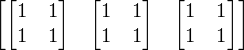

In [20]:
E_Array

In [21]:
W_Array_flip = W_Array[:, :, ::-1, ::-1]

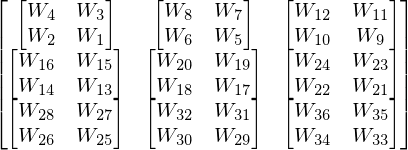

In [22]:
W_Array_flip

In [23]:
# 实现swapaxes
# flip将每一个kernel中翻转，swapaxes将轴旋转
W_Array_flip = np.swapaxes(np.array(W_Array_flip).reshape(W_Array_flip.shape), 0, 1)

In [24]:
W_Array_flip_col = W_Array_flip.reshape(N_in, N_out*K*K)

In [25]:
W_Array_flip_col

array([[W_4, W_3, W_2, W_1, W_16, W_15, W_14, W_13, W_28, W_27, W_26, W_25],
       [W_8, W_7, W_6, W_5, W_20, W_19, W_18, W_17, W_32, W_31, W_30, W_29],
       [W_12, W_11, W_10, W_9, W_24, W_23, W_22, W_21, W_36, W_35, W_34,
        W_33]], dtype=object)

In [26]:
E_Array_pad = MutableDenseNDimArray.zeros(N_out, H_out+2*(K-1), W_out+2*(K-1))
for n in range(N_out):
    for h in range(K-1, H_out+(K-1)):
        for w in range(K-1, W_out+(K-1)):
            E_Array_pad[n, h, w] = 1

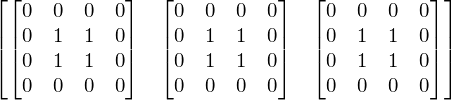

In [27]:
E_Array_pad

In [28]:
def im2col(img, kernel_size, stride=1):
    """
    :param img: 输入的图像 C_in H_in W_in
    :param kernel_size: 卷积核大小
    :param stride: 卷积核间距
    :return: img_cols (H*W) * (C*K*K)
    """
    img_channel, img_h, img_w = img.shape
    img_cols = None
#     print('img_channel', img_channel)
#     print('img_h', img_h)
#     print('img_w', img_w)
    for channel_i in range(img_channel):
        # 通道i的图像是 H W
        img_channel_i = img[channel_i, :, :]
        img_channel_i_cols = []
        for h_i in range(0, img_w-kernel_size+1, stride):
            for w_i in range(0, img_h-kernel_size+1, stride):
                img_channel_i_patch = img_channel_i[h_i:h_i+kernel_size, w_i:w_i+kernel_size]
                # print(img_channel_i_patch.shape)
                # 小的patch K*K reshape为行向量
                img_channel_i_patch_row = img_channel_i_patch.reshape(K*K)
                img_channel_i_cols.append(img_channel_i_patch_row)
                # print(img_channel_i_patch_row.shape)
                assert img_channel_i_patch_row.shape ==  (kernel_size*kernel_size, )
        # print('len(img_channel_i_cols):', len(img_channel_i_cols))
        img_channel_i_cols = np.array(img_channel_i_cols)
        if img_cols is None:
            img_cols = img_channel_i_cols
        else:
            img_cols = np.hstack((img_cols, img_channel_i_cols))

    return img_cols

In [29]:
E_Array_pad_col = im2col(E_Array_pad, K, 1)

In [30]:
E_Array_pad_col

array([[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=object)

In [31]:
E_next_Array_col = MutableDenseNDimArray.zeros(N_in, H_in*W_in)
E_Array_pad_col_transpose = np.transpose(E_Array_pad_col)
i_limit = W_Array_flip_col.shape[0]
j_limit = E_Array_pad_col_transpose.shape[1]
k_limit = W_Array_flip_col.shape[1]
# print('i_limit:', i_limit)
# print('j_limit:', j_limit)
# print('k_limit:', k_limit)
for i in range(i_limit):
    for j in range(j_limit):
        error_next = 0
        for k in range(k_limit):
            error_next += W_Array_flip_col[i, k]*E_Array_pad_col_transpose[k, j]
        E_next_Array_col[i, j] += error_next
E_next_Array = E_next_Array_col.reshape(N_in, H_in, W_in)
print(E_next_Array)

[[[W_1 + W_13 + W_25, W_1 + W_13 + W_14 + W_2 + W_25 + W_26, W_14 + W_2 + W_26], [W_1 + W_13 + W_15 + W_25 + W_27 + W_3, W_1 + W_13 + W_14 + W_15 + W_16 + W_2 + W_25 + W_26 + W_27 + W_28 + W_3 + W_4, W_14 + W_16 + W_2 + W_26 + W_28 + W_4], [W_15 + W_27 + W_3, W_15 + W_16 + W_27 + W_28 + W_3 + W_4, W_16 + W_28 + W_4]], [[W_17 + W_29 + W_5, W_17 + W_18 + W_29 + W_30 + W_5 + W_6, W_18 + W_30 + W_6], [W_17 + W_19 + W_29 + W_31 + W_5 + W_7, W_17 + W_18 + W_19 + W_20 + W_29 + W_30 + W_31 + W_32 + W_5 + W_6 + W_7 + W_8, W_18 + W_20 + W_30 + W_32 + W_6 + W_8], [W_19 + W_31 + W_7, W_19 + W_20 + W_31 + W_32 + W_7 + W_8, W_20 + W_32 + W_8]], [[W_21 + W_33 + W_9, W_10 + W_21 + W_22 + W_33 + W_34 + W_9, W_10 + W_22 + W_34], [W_11 + W_21 + W_23 + W_33 + W_35 + W_9, W_10 + W_11 + W_12 + W_21 + W_22 + W_23 + W_24 + W_33 + W_34 + W_35 + W_36 + W_9, W_10 + W_12 + W_22 + W_24 + W_34 + W_36], [W_11 + W_23 + W_35, W_11 + W_12 + W_23 + W_24 + W_35 + W_36, W_12 + W_24 + W_36]]]


In [32]:
E_Array_pad_col_transpose

array([[0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0]], dtype=object)

In [33]:
E_Array_pad_col_transpose.shape

In [34]:
W_Array_flip_col.shape